## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm
from sklearn.metrics import recall_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from catboost import cv
from catboost import *
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
df_test = pd.read_csv("test_dataset_test.csv", parse_dates=[9])
df_train = pd.read_csv("train_dataset_train.csv", parse_dates=[9])
#subway = pd.read_csv("subway\subway.csv")

In [3]:
df_train

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,Пропуск FacePay,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,15005
1091017,1091018,141174B366F14A8703903813A49374DB,Пропуск FacePay,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,Пропуск FacePay,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,Пропуск FacePay,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014


In [4]:
df_test

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
0,1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1,1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
2,1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
3,1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
4,1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39
...,...,...,...,...,...,...,...,...,...,...
561885,1652907,B6FADEB8705FAF8E9DFD9016A613D997,Пропуск FacePay,279,Калужская (Южный),6007,Калужская,6,Калужско-Рижская,2022-09-19 01:33:11
561886,1652908,77F2868FC2648ACCBD58F1F8AB66C321,Пропуск FacePay,2463,Кунцевская БКЛ (Первый),11020,Кунцевская,11,Большая кольцевая,2022-09-19 02:03:59
561887,1652909,29A4ACF592877817B8D00D969DFDB681,Пропуск FacePay,64,Проспект Вернадского ( Южный ),1012,Проспект Вернадского,1,Сокольническая,2022-09-19 02:51:34
561888,1652910,DE9EBEFD0DF4A351013AA574B075F535,Пропуск FacePay,285,Коньково (Южный),6009,Коньково,6,Калужско-Рижская,2022-09-19 02:58:10


In [5]:
#subway

In [6]:
#subway['destination'] = subway['route_id'].map(lambda x: int(x.split('_')[1]))

In [7]:
#subway

In [8]:
#subway = subway[['start_station_id','destination','station_cnt','route_dur']]

In [9]:
#subway =subway.rename(columns={'start_station_id': 'station_id', 'destination': 'label'})


In [10]:
#subway = subway.drop(subway[subway['route_dur'] == 0.00].index)

In [11]:
#subway = subway.sort_values(by = ['station_id','label','route_dur'])

In [12]:
#subway.head(30)

In [13]:
#subway.groupby(by = ['station_id','label']).agg(route_dur = ('route_dur','min')).reset_index().head(30).merge(subway, how = 'left', on=['station_id','label','route_dur'])

In [14]:
def preprocessing (data):
    
    encoder = OrdinalEncoder(dtype='int32')
    encoder.fit(data[['ticket_id']])
    data[['ticket_id']] = pd.DataFrame(encoder.transform(data[['ticket_id']]))
    
    data['month'] = data['pass_dttm'].dt.month
    data['day'] = data['pass_dttm'].dt.day
    data['day_of_week'] = data['pass_dttm'].dt.dayofweek+1
    data['hours'] = data['pass_dttm'].dt.hour
    
    data['number_trip'] = data[['ticket_id','month','day']].groupby(['ticket_id','month']).cumcount()+1
    
    count_day_df = data[['ticket_id','month','day']].groupby(['ticket_id','month']).agg(count_day = ('day','count')).reset_index()[['ticket_id','count_day']]
    
    data = data.merge(count_day_df, how = 'left', on = 'ticket_id')
    
    print(data.head())
    
    return data
    

In [15]:
df_train = preprocessing (df_train)

   id  ticket_id           ticket_type_nm  entrance_id           entrance_nm  \
0   1      84909          Пропуск FacePay         2402         Лефортово БКЛ   
1   2      24211     СК учащегося 30 дней          110  Войковская ( Южный )   
2   3     276072  БСК дружинника г.Москвы          110  Войковская ( Южный )   
3   4       1788                  30 дней          110  Войковская ( Южный )   
4   5     196752                  КОШЕЛЕК          110  Войковская ( Южный )   

   station_id  station_nm  line_id            line_nm           pass_dttm  \
0       11007   Лефортово       11  Большая кольцевая 2022-09-12 05:00:13   
1        2006  Войковская        2     Замоскворецкая 2022-09-12 05:00:54   
2        2006  Войковская        2     Замоскворецкая 2022-09-12 05:00:55   
3        2006  Войковская        2     Замоскворецкая 2022-09-12 05:01:13   
4        2006  Войковская        2     Замоскворецкая 2022-09-12 05:02:55   

   time_to_under  label  month  day  day_of_week  hours 

In [16]:
df_test = preprocessing (df_test)

        id  ticket_id       ticket_type_nm  entrance_id  \
0  1091022      44657              КОШЕЛЕК          110   
1  1091023     168417      Пропуск FacePay          184   
2  1091024      96417  СК студента 30 дней          110   
3  1091025      83378              КОШЕЛЕК          107   
4  1091026      69779              КОШЕЛЕК          110   

             entrance_nm  station_id  station_nm  line_id  \
0   Войковская ( Южный )        2006  Войковская        2   
1  Молодёжная (Западный)        3010  Молодёжная        3   
2   Войковская ( Южный )        2006  Войковская        2   
3   Сокол ( Южн./Вост. )        2018       Сокол        2   
4   Войковская ( Южный )        2006  Войковская        2   

               line_nm           pass_dttm  month  day  day_of_week  hours  \
0       Замоскворецкая 2022-09-12 05:00:03      9   12            1      5   
1  Арбатско-Покровская 2022-09-12 05:00:45      9   12            1      5   
2       Замоскворецкая 2022-09-12 05:00:52  

In [17]:
encoder = OrdinalEncoder(dtype='int16', handle_unknown = 'use_encoded_value', unknown_value = 100)
encoder.fit(df_train[['ticket_type_nm']])

df_train[['ticket_type_nm']] = pd.DataFrame(encoder.transform(df_train[['ticket_type_nm']]))


df_test[['ticket_type_nm']] = pd.DataFrame(encoder.transform(df_test[['ticket_type_nm']]))

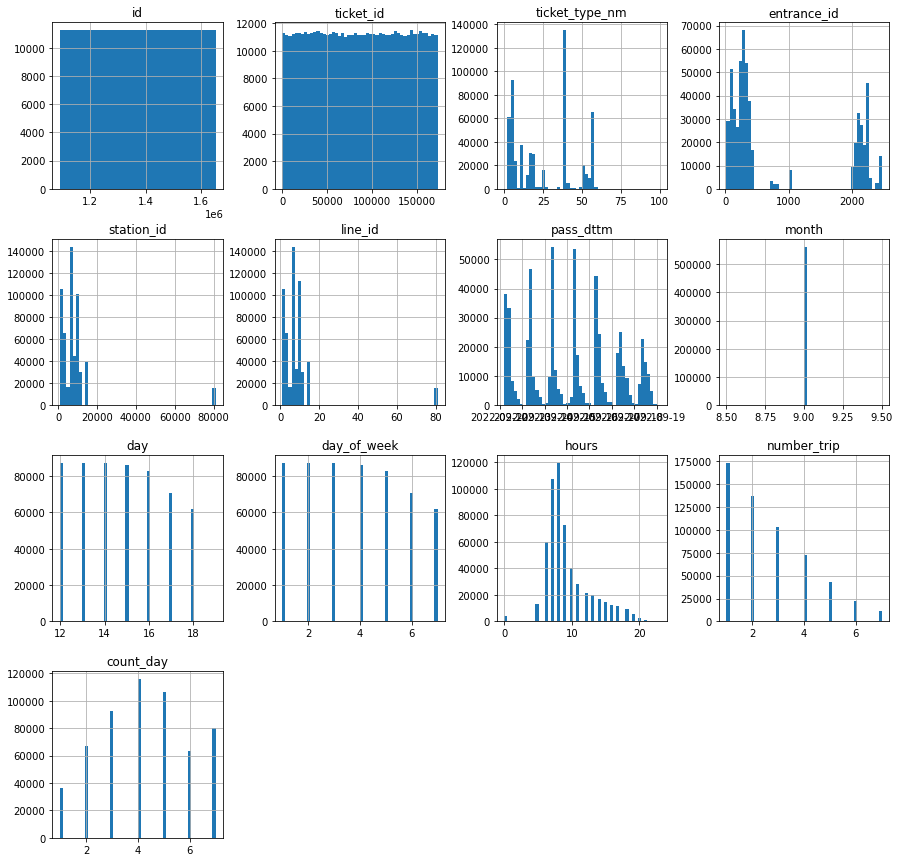

In [18]:
df_test.hist(bins = 50, figsize=(15,15))
plt.show()

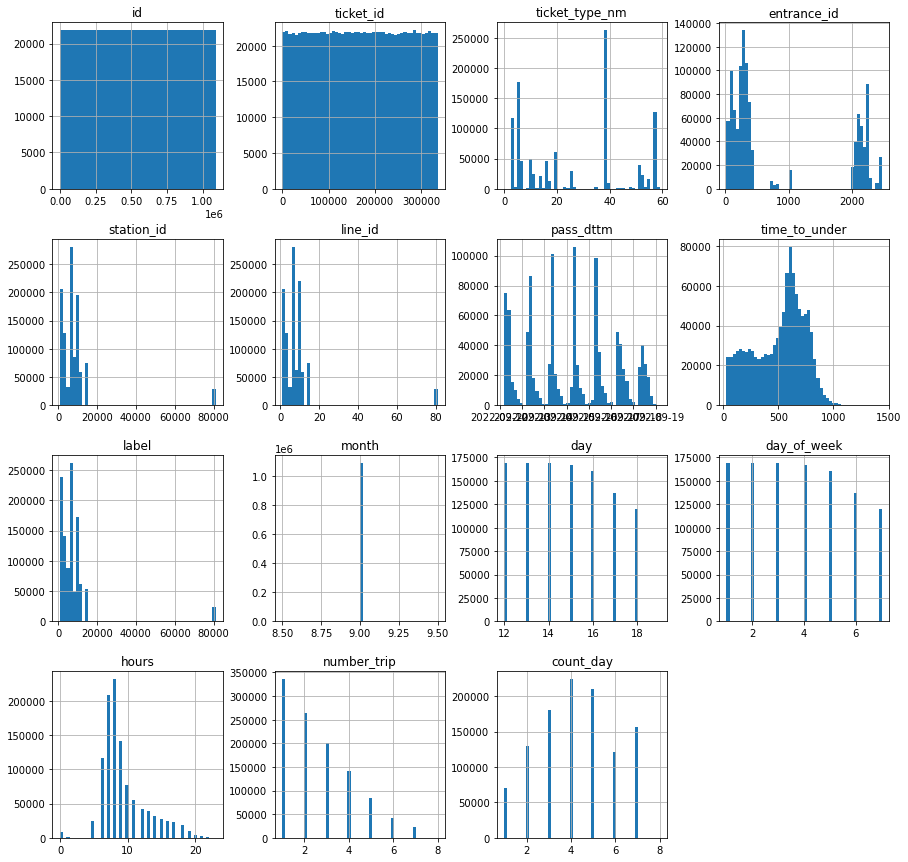

In [19]:
df_train.hist(bins = 50, figsize=(15,15))
plt.show()

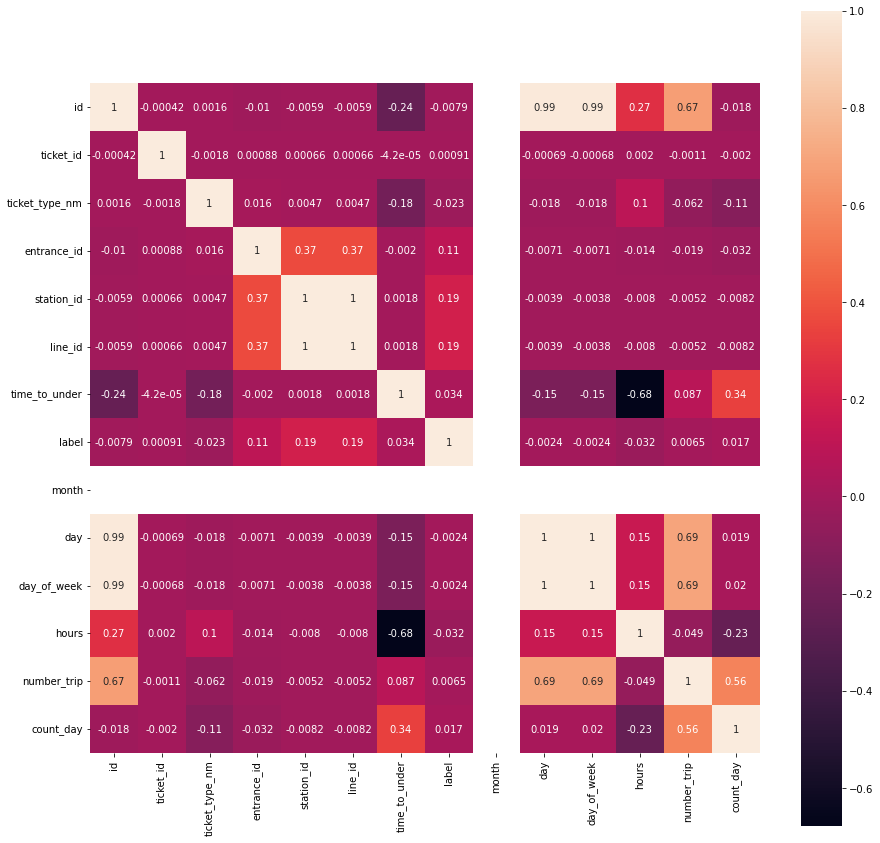

In [20]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [27]:
X = data.drop(["id", 'ticket_id',  "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under",'day','month'], axis = 1)
y = data[["time_to_under", "label"]]

In [29]:
X

,ticket_type_nm,entrance_id,station_id,line_id,day_of_week,hours,number_trip,count_day
0,40,2402,11007,11,1,5,1,1
1,53,110,2006,2,1,5,1,5
2,26,110,2006,2,1,5,1,5
3,3,110,2006,2,1,5,1,6
4,38,110,2006,2,1,5,1,4
...,...,...,...,...,...,...,...,...
1091016,40,2283,15005,15,1,2,1,1
1091017,40,278,6007,6,1,3,2,2
1091018,40,118,2010,2,1,3,1,1
1091019,40,2452,11014,11,1,3,1,1


In [30]:
y

,time_to_under,label
0,216.316667,8001
1,648.183333,9011
2,865.333333,7022
3,1048.233333,2022
4,965.600000,2017
...,...,...
1091016,124.750000,15005
1091017,56.066667,6007
1091018,91.283333,2010
1091019,47.900000,11014


In [46]:
STATE = np.random.seed(42)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=STATE, stratify= y['label'])

## Обучение модели

### Деревья

Для станции 

In [49]:
best_model = None
best_result = 0

In [50]:
param_grid = {'n_estimators': list(range(1, 24)), 'max_depth': list(range(1, 22))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestClassifier(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'], n_jobs= -1)
    model.fit(X_train, y_train["label"])
    pred_class = model.predict(X_test)
    score = recall_score(y_test["label"], pred_class , average='macro')
    if score > best_result:
        best_result = score
        best_model = model 
        print('Лучшая модель:', best_model)
        print('Лучшая результат Recall:', best_result)
        print()

  0%|          | 0/483 [00:00<?, ?it/s]

Лучшая модель: RandomForestClassifier(max_depth=1, n_estimators=1, n_jobs=-1)
Лучшая результат Recall: 0.004028107454457957

Лучшая модель: RandomForestClassifier(max_depth=1, n_estimators=2, n_jobs=-1)
Лучшая результат Recall: 0.00650783722190966

Лучшая модель: RandomForestClassifier(max_depth=2, n_estimators=1, n_jobs=-1)
Лучшая результат Recall: 0.009902061128930375

Лучшая модель: RandomForestClassifier(max_depth=2, n_estimators=2, n_jobs=-1)
Лучшая результат Recall: 0.011302815318814271

Лучшая модель: RandomForestClassifier(max_depth=2, n_estimators=10, n_jobs=-1)
Лучшая результат Recall: 0.011576402999432342

Лучшая модель: RandomForestClassifier(max_depth=3, n_estimators=2, n_jobs=-1)
Лучшая результат Recall: 0.011848218400031751

Лучшая модель: RandomForestClassifier(max_depth=3, n_estimators=3, n_jobs=-1)
Лучшая результат Recall: 0.012835102955738883

Лучшая модель: RandomForestClassifier(max_depth=3, n_estimators=5, n_jobs=-1)
Лучшая результат Recall: 0.01396132434551128

Л

In [57]:
#best_model = RandomForestClassifier(random_state=STATE, n_estimators=23, max_depth=21)

In [49]:
#best_model = RandomForestClassifier(random_state=STATE, n_estimators=22, max_depth=17) # 0.302048

In [51]:
#best_result = 0.4

In [51]:
print('Лучшая модель:', best_model)
print('Лучний результат, recall:', best_result)

Лучшая модель: RandomForestClassifier(max_depth=17, n_estimators=22, n_jobs=-1)
Лучний результат, recall: 0.09334628864854382


In [52]:
best_model_label = best_model
label_metric = best_result

Для времени

In [23]:
best_model = None
best_result = 0

In [24]:
param_grid = {'n_estimators': list(range(1, 5)), 'max_depth': list(range(1, 5))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestRegressor(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'], n_jobs=-1)
    model.fit(X_train, y_train["time_to_under"])
    pred_class = model.predict(X_test)
    score = r2_score(y_test["time_to_under"], pred_class)
    if score > best_result:
        print(score)
        best_result = score
        best_model = model 

  0%|          | 0/16 [00:00<?, ?it/s]

0.3925303511446506
0.4511506290933367
0.4511545488319847
0.47772219122117965
0.4777242959277348
0.4777292754183512
0.496727352292326
0.4967457325241894
0.49675270801064286


In [25]:
print('Лучшая модель:', best_model)
print('Лучний результат, r2:', best_result)

Лучшая модель: RandomForestRegressor(max_depth=4, n_estimators=3, n_jobs=-1)
Лучний результат, r2: 0.49675270801064286


In [26]:
best_model_time_to_under = best_model
time_to_under_metric = best_result

### Оценка точности

In [27]:
score_rf = 0.5 * label_metric +  0.5 * time_to_under_metric
score_rf

0.25642792234079814

## Catboost

### Классификатор

Для станции, классификатор

In [20]:
cbc = CatBoostClassifier(iterations=45,
                           learning_rate=0.1,
                           verbose=False
                           )

fit_model = cbc.fit(X_train, y_train['label'],
                    plot = True
                      )
print('Model is fitted: ' + str(cbc.is_fitted()))
print('Model params:')
print(cbc.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'iterations': 45, 'learning_rate': 0.1, 'verbose': False}


In [21]:
preds_class = cbc.predict(X_test)

In [22]:
len(y_test["label"].unique())

276

In [23]:
len(pd.DataFrame(preds_class)[0].unique())

120

In [24]:
recall = recall_score(y_test["label"], pd.DataFrame(preds_class)[0], average='macro')

In [25]:
print('Лучний результат, recall:', recall)

Лучний результат, recall: 0.033639608222470904


### Регрессор

In [53]:
X

,ticket_type_nm,entrance_id,station_id,line_id,day_of_week,hours,number_trip,count_day
0,40,2402,11007,11,1,5,1,1
1,53,110,2006,2,1,5,1,5
2,26,110,2006,2,1,5,1,5
3,3,110,2006,2,1,5,1,6
4,38,110,2006,2,1,5,1,4
...,...,...,...,...,...,...,...,...
1091016,40,2283,15005,15,1,2,1,1
1091017,40,278,6007,6,1,3,2,2
1091018,40,118,2010,2,1,3,1,1
1091019,40,2452,11014,11,1,3,1,1


In [54]:
cbr = CatBoostRegressor(loss_function='RMSE',
                          iterations=4_000,
                          custom_metric='R2',
                          learning_rate=0.001,
                          verbose=False,
                          use_best_model=True,
                          random_seed = 42,
                          cat_features = [0,1,2,3,4,5,6,7]                          
)

In [55]:
cbr.fit(X_train,y_train['time_to_under'],
          eval_set = (X_test,y_test['time_to_under']),
          plot = True,
          early_stopping_rounds=50
)
print('Model is fitted: ' + str(cbr.is_fitted()))
print('Model params:')
print(cbr.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'iterations': 4000, 'learning_rate': 0.001, 'loss_function': 'RMSE', 'random_seed': 42, 'use_best_model': True, 'verbose': False, 'custom_metric': 'R2', 'cat_features': [0, 1, 2, 3, 4, 5, 6, 7]}


In [56]:
print('Tree count: ' + str(cbr.tree_count_))

Tree count: 4000


In [57]:
pred = cbr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test["time_to_under"], pred)))
r2 = r2_score(y_test["time_to_under"], pred)
print('Testing performance')
print('RMSE: {:.4f}'.format(rmse))
print('R2: {:.4f}'.format(r2))

Testing performance
RMSE: 155.9664
R2: 0.5517


In [36]:
score_cb = 0.5 * recall +  0.5 * r2
score_cb

0.2611598428720291

### Catboost кроссвалидация

Для времени, регрессор

In [60]:
params ={}
params['loss_function'] = 'RMSE'
params['custom_loss'] = 'R2'
params['iterations'] = 2_000
params['random_seed'] = STATE
params['learning_rate'] = 0.1

In [61]:
cv_data = cv(
    params = params,
    pool = Pool(X, label = y['time_to_under']),
    fold_count = 5,
    shuffle = True,
    partition_random_seed = 42,
    plot = True,
    stratified = False,
    verbose = False,
    early_stopping_rounds=50
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]


KeyboardInterrupt: 

In [27]:
cv_data.head()

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std,test-R2-mean,test-R2-std,train-R2-mean,train-R2-std
0,0,510.276418,0.196549,510.276153,0.045967,-3.802633,0.012661,-3.802602,0.003054
1,1,465.103527,0.166398,465.102831,0.049021,-2.989952,0.010405,-2.989918,0.002568
2,2,424.950842,0.148355,424.949884,0.059742,-2.330779,0.008884,-2.330745,0.002015
3,3,389.428458,0.131826,389.426563,0.055261,-1.797202,0.007458,-1.797159,0.001585
4,4,357.979152,0.117456,357.978541,0.039145,-1.363654,0.006041,-1.363633,0.001480


In [23]:
best_value  = np.max(cv_data['test-R2-mean'])
best_iter = np.argmax(cv_data['test-R2-mean'])
print('Best validation R2 score, not stratifired: {:.4f}+-{:.4f} on step {}'.format(
    best_value,
    cv_data['test-R2-mean'][best_iter],
    best_iter)
      )

Best validation R2 score, not stratifired: 0.5372+-0.5372 on step 999


Для метки, классификатор

In [73]:
params ={}
params['loss_function'] = 'MultiClass'
params['custom_loss'] = 'Recall'
params['iterations'] = 1_000
params['random_seed'] = STATE
params['learning_rate'] = 0.5

In [74]:
cv_data = cv(
    params = params,
    pool = Pool(X, label = y['label']),
    fold_count = 5,
    shuffle = True,
    partition_random_seed = 42,
    plot = True,
    stratified = False,
    verbose = False,
    early_stopping_rounds=50
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]


: 

: 

## Проверка на тестовой выборке

In [31]:
df_test

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,month,day,day_of_week,hours,number_trip,count_day
0,1091022,44657,38,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03,9,12,1,5,1,4
1,1091023,168417,40,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45,9,12,1,5,1,3
2,1091024,96417,51,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52,9,12,1,5,1,6
3,1091025,83378,38,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58,9,12,1,5,1,3
4,1091026,69779,38,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39,9,12,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561885,1652907,123518,40,279,Калужская (Южный),6007,Калужская,6,Калужско-Рижская,2022-09-19 01:33:11,9,19,1,1,1,1
561886,1652908,80912,40,2463,Кунцевская БКЛ (Первый),11020,Кунцевская,11,Большая кольцевая,2022-09-19 02:03:59,9,19,1,2,2,2
561887,1652909,28200,40,64,Проспект Вернадского ( Южный ),1012,Проспект Вернадского,1,Сокольническая,2022-09-19 02:51:34,9,19,1,2,1,1
561888,1652910,150276,40,285,Коньково (Южный),6009,Коньково,6,Калужско-Рижская,2022-09-19 02:58:10,9,19,1,2,3,3


In [69]:
X_test_test = df_test.drop(["id", 'ticket_id',  "entrance_nm", "station_nm", "line_nm", "pass_dttm",'day','month'], axis = 1)

In [70]:
X_test_test

,ticket_type_nm,entrance_id,station_id,line_id,day_of_week,hours,number_trip,count_day
0,38,110,2006,2,1,5,1,4
1,40,184,3010,3,1,5,1,3
2,51,110,2006,2,1,5,1,6
3,38,107,2018,2,1,5,1,3
4,38,110,2006,2,1,5,1,2
...,...,...,...,...,...,...,...,...
561885,40,279,6007,6,1,1,1,1
561886,40,2463,11020,11,1,2,2,2
561887,40,64,1012,1,1,2,1,1
561888,40,285,6009,6,1,2,3,3


### Деревья

In [60]:
best_model_time_to_under.fit(X, y["time_to_under"])

NameError: name 'best_model_time_to_under' is not defined

In [83]:
predicted_test_time_to_under = best_model_time_to_under.predict(X_test_test)


In [84]:
predicted_test_time_to_under

array([596.17132316, 602.16474063, 491.6880438 , ...,  67.57210339,
        48.94926083,  47.2594324 ])

In [71]:
best_model_label.fit(X, y["label"])

RandomForestClassifier(max_depth=17, n_estimators=22, n_jobs=-1)

In [72]:
predicted_test_label = best_model_label.predict(X_test_test)

In [73]:
predicted_test_label

array([6009, 5006, 6009, ..., 9015, 6007, 3010], dtype=int64)

In [74]:
len(pd.Series(predicted_test_label).unique())

274

### Бустинг

In [75]:
predicted_test_time_to_under = None

In [76]:
predicted_test_time_to_under = cbr.predict(X_test_test)

In [35]:
predicted_test_label = None

In [36]:
predicted_test_label = cbc.predict(X_test_test)

In [77]:
df_unswer = pd.DataFrame(columns=['id','time_to_under','label'])

In [78]:
df_unswer['id'] = df_test['id']

In [79]:
df_unswer['time_to_under'] = pd.Series(predicted_test_time_to_under)

In [80]:
df_unswer['label'] = pd.Series(predicted_test_label)

In [81]:
df_unswer.to_csv('hackathon_unswer.csv', index=False) 

In [82]:
df_unswer

,id,time_to_under,label
0,1091022,693.058192,6009
1,1091023,505.830604,5006
2,1091024,651.164072,6009
3,1091025,660.511268,7004
4,1091026,622.642154,6009
...,...,...,...
561885,1652907,220.555032,6007
561886,1652908,390.516688,11020
561887,1652909,365.423203,9015
561888,1652910,503.775701,6007
